In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RBF full

In [13]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

RBF = pd.read_csv('result_rbf_SP.csv', names= colnames)

In [14]:
RBF['accuracy'] = (RBF.tp+RBF.tn)/(RBF.tp+RBF.tn+RBF.fp+RBF.fn)
RBF['jaccard'] = RBF.tp/(RBF.tp+RBF.fp + RBF.fn)
RBF['precision'] = RBF.tp/(RBF.tp+RBF.fp)
RBF['recall'] = RBF.tp/(RBF.tp+RBF.fn)
RBF['specificity'] = RBF.tn/(RBF.tn+RBF.fp)

In [15]:
RBF_agg = RBF.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [16]:
['_'.join(col) for col in RBF_agg.columns.values]

RBF_agg.columns  = ['_'.join(col) for col in RBF_agg.columns.values]
RBF_agg.reset_index(inplace=True)

In [17]:
RBF_agg

,scene,N,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
0,LC08_L1TP_003052_20160120_20170405_01_T1,10,0.780002,0.072358,0.413702,0.160627,0.913926,0.178940,0.475795,0.231654,0.933042,0.154919
1,LC08_L1TP_003052_20160120_20170405_01_T1,20,0.698648,0.105539,0.396612,0.079844,0.688118,0.277829,0.572726,0.165183,0.761997,0.219655
2,LC08_L1TP_003052_20160120_20170405_01_T1,40,0.749241,0.100263,0.466252,0.120377,0.757985,0.256290,0.633930,0.212963,0.807252,0.215458
3,LC08_L1TP_003052_20160120_20170405_01_T1,80,0.751639,0.107697,0.486714,0.110528,0.746279,0.253037,0.663943,0.186369,0.795756,0.220868
4,LC08_L1TP_003052_20160120_20170405_01_T1,160,0.848555,0.069895,0.595754,0.098659,0.931401,0.152860,0.636773,0.100279,0.955098,0.117997
...,...,...,...,...,...,...,...,...,...,...,...,...
155,LC08_L1TP_066014_20160520_20170223_01_T1,80,0.993795,0.012695,0.988762,0.023012,0.998482,0.001366,0.990271,0.023424,0.998133,0.001685
156,LC08_L1TP_066014_20160520_20170223_01_T1,160,0.996891,0.001646,0.994371,0.002980,0.998807,0.000981,0.995555,0.003199,0.998534,0.001208
157,LC08_L1TP_066014_20160520_20170223_01_T1,320,0.997010,0.000854,0.994589,0.001537,0.998563,0.001745,0.996017,0.001711,0.998231,0.002155
158,LC08_L1TP_066014_20160520_20170223_01_T1,640,0.997106,0.000353,0.994759,0.000639,0.999144,0.000765,0.995609,0.001012,0.998949,0.000941


In [18]:
RBF_N = RBF_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/2805215620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RBF_N = RBF_agg.groupby('N').agg('mean')


In [19]:
RBF_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'jaccard_std', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,recall_mean,specificity_mean
N,,,,,,,
10,0.830458,0.109488,0.495985,0.137302,0.675276,0.676522,0.890598
20,0.856165,0.082719,0.531865,0.107079,0.657789,0.716948,0.895087
40,0.869756,0.067534,0.550395,0.087461,0.668773,0.727926,0.904734
80,0.898930,0.046371,0.594443,0.082310,0.709605,0.745214,0.932783
160,0.908750,0.034611,0.608826,0.067547,0.723909,0.760301,0.946463
320,0.922182,0.019020,0.636580,0.053211,0.754733,0.766223,0.959888
640,0.927550,0.014483,0.651135,0.048254,0.773913,0.766757,0.965593
1280,0.930879,0.010329,0.658612,0.031997,0.787260,0.760236,0.972161


In [20]:
RBF_N.reset_index(inplace=True)

<AxesSubplot: xlabel='N'>

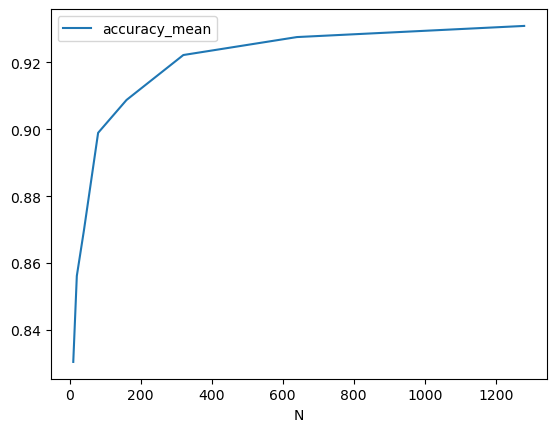

In [21]:
RBF_N.plot('N', 'accuracy_mean')

# Linear Full

In [22]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'timestamp', 'scene']

lin = pd.read_csv('result_linear_SP.csv', names= colnames)

In [23]:
lin['accuracy'] = (lin.tp+lin.tn)/(lin.tp+lin.tn+lin.fp+lin.fn)
lin['jaccard'] = lin.tp/(lin.tp+lin.fp + lin.fn)
lin['precision'] = lin.tp/(lin.tp+lin.fp)
lin['recall'] = lin.tp/(lin.tp+lin.fn)
lin['specificity'] = lin.tn/(lin.tn+lin.fp)

In [24]:
lin_agg = lin.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [25]:
['_'.join(col) for col in lin_agg.columns.values]

lin_agg.columns  = ['_'.join(col) for col in lin_agg.columns.values]
lin_agg.reset_index(inplace=True)

In [26]:
lin_N = lin_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/3553675179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lin_N = lin_agg.groupby('N').agg('mean')


In [27]:
lin_N[['accuracy_mean', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,
10,0.826433,0.486129,0.691895,0.651675,0.895518
20,0.832766,0.509467,0.668072,0.702425,0.882430
40,0.823576,0.487450,0.671881,0.666012,0.883461
80,0.845683,0.524598,0.674634,0.706366,0.892359
160,0.832981,0.521993,0.637519,0.740371,0.856800
320,0.859003,0.533864,0.655879,0.756105,0.899558
640,0.856352,0.537397,0.648946,0.774936,0.891755
1280,0.869072,0.539394,0.664827,0.772169,0.912376


<AxesSubplot: xlabel='N'>

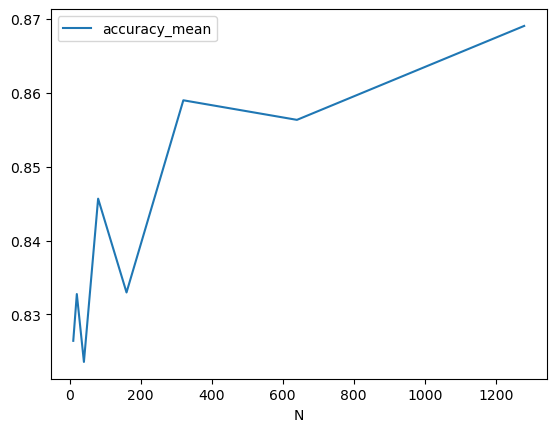

In [28]:
lin_N.reset_index(inplace=True)
lin_N.plot('N', 'accuracy_mean')

# Lin 4

In [29]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'timestamp', 'scene']

lin4 = pd.read_csv('result_linear_SP_pca4.csv', names= colnames)

In [30]:
lin4['accuracy'] = (lin4.tp+lin4.tn)/(lin4.tp+lin4.tn+lin4.fp+lin4.fn)
lin4['jaccard'] = lin4.tp/(lin4.tp+lin4.fp + lin4.fn)
lin4['precision'] = lin4.tp/(lin4.tp+lin4.fp)
lin4['recall'] = lin4.tp/(lin4.tp+lin4.fn)
lin4['specificity'] = lin4.tn/(lin4.tn+lin4.fp)

In [31]:
lin4_SVs = lin4[lin4['scene'] == 'LC08_L1TP_003052_20160120_20170405_01_T1'][['N', 'SV0', 'SV1']]
lin4_SVs['SV'] = lin4_SVs['SV0']+lin4_SVs['SV1']
lin4_SVs

,N,SV0,SV1,SV
0,10,2,2,4
1,10,4,4,8
2,10,4,3,7
3,10,5,5,10
4,10,5,5,10
...,...,...,...,...
2891,1280,427,426,853
3119,1280,415,414,829
3120,1280,392,393,785
3122,1280,416,416,832


In [32]:
N_sizes = [10,20,40,80,160,320,640,1280]

l_lin = []
for N in N_sizes:
    l_lin.append( np.array(lin4_SVs[lin4_SVs['N'] == N]['SV'])/N)

In [33]:
lin4_agg = lin4.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [34]:
['_'.join(col) for col in lin4_agg.columns.values]

lin4_agg.columns  = ['_'.join(col) for col in lin4_agg.columns.values]
lin4_agg.reset_index(inplace=True)

In [35]:
lin4_N = lin4_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/1371705044.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lin4_N = lin4_agg.groupby('N').agg('mean')


In [36]:
lin4_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.825062,0.102530,0.488916,0.685335,0.663302,0.888376
20,0.842883,0.074219,0.498943,0.691639,0.658596,0.910258
40,0.841087,0.072161,0.477704,0.703008,0.608797,0.919234
80,0.861144,0.046725,0.492514,0.732031,0.598354,0.943300
160,0.860003,0.051146,0.484202,0.727006,0.585539,0.943297
320,0.863390,0.023682,0.477813,0.775323,0.554866,0.959107
640,0.866169,0.013505,0.473383,0.754468,0.542381,0.963337
1280,0.866798,0.007076,0.475214,0.792820,0.544186,0.963676


In [37]:
lin4_N.accuracy_std.mean()

0.04888055190290058

<AxesSubplot: xlabel='N'>

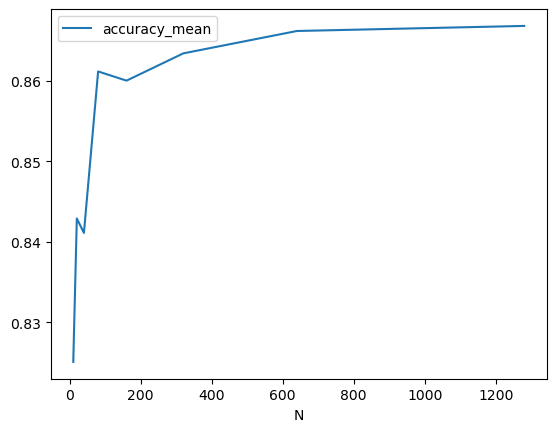

In [38]:
lin4_N.reset_index(inplace=True)
lin4_N.plot('N', 'accuracy_mean')

# RBF PCA4

In [39]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

RBF4 = pd.read_csv('result_rbf_SP_pca4.csv', names= colnames)

In [40]:
RBF4['accuracy'] = (RBF4.tp+RBF4.tn)/(RBF4.tp+RBF4.tn+RBF4.fp+RBF4.fn)
RBF4['jaccard'] = RBF4.tp/(RBF4.tp+RBF4.fp + RBF4.fn)
RBF4['precision'] = RBF4.tp/(RBF4.tp+RBF4.fp)
RBF4['recall'] = RBF4.tp/(RBF4.tp+RBF4.fn)
RBF4['specificity'] = RBF4.tn/(RBF4.tn+RBF4.fp)

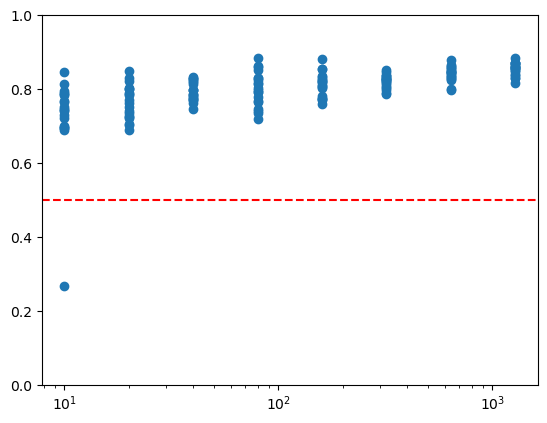

In [41]:
scenes = np.unique(RBF4['scene'])
dfplt = RBF4[RBF4['scene'] == scenes[17]]
plt.scatter(dfplt['N'], dfplt['accuracy'])
plt.xscale('log')
plt.ylim((0,1))
plt.axhline(0.5, linestyle = 'dashed', c = 'red')
plt.show()

In [42]:
RBF4_SVs = RBF4[RBF4['scene'] == 'LC08_L1TP_003052_20160120_20170405_01_T1'][['N', 'SV0', 'SV1']]
RBF4_SVs['SV'] = RBF4_SVs['SV0']+RBF4_SVs['SV1']
RBF4_SVs

,N,SV0,SV1,SV
0,10,5,5,10
1,10,4,4,8
2,10,5,5,10
3,10,5,5,10
4,10,3,2,5
...,...,...,...,...
2900,1280,199,203,402
3118,1280,141,140,281
3120,1280,155,156,311
3121,1280,169,174,343


In [43]:
N_sizes = [10,20,40,80,160,320,640,1280]

l_RBF = []
for N in N_sizes:
    l_RBF.append( np.array(RBF4_SVs[RBF4_SVs['N'] == N]['SV'])/N)

In [44]:
RBF4_agg = RBF4.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [45]:
RBF4_agg.columns  = ['_'.join(col) for col in RBF4_agg.columns.values]
RBF4_agg.reset_index(inplace=True)

In [46]:
RBF4_agg

,scene,N,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
0,LC08_L1TP_003052_20160120_20170405_01_T1,10,0.745016,0.127705,0.426749,0.154519,0.820179,0.237284,0.569896,0.279742,0.833115,0.274510
1,LC08_L1TP_003052_20160120_20170405_01_T1,20,0.743635,0.087058,0.429538,0.100471,0.777723,0.250784,0.579264,0.220447,0.826327,0.210723
2,LC08_L1TP_003052_20160120_20170405_01_T1,40,0.757898,0.093669,0.433370,0.100048,0.822610,0.245945,0.543725,0.200048,0.865644,0.204757
3,LC08_L1TP_003052_20160120_20170405_01_T1,80,0.762915,0.091077,0.465411,0.072132,0.804768,0.245497,0.598245,0.173082,0.845757,0.207475
4,LC08_L1TP_003052_20160120_20170405_01_T1,160,0.798637,0.081310,0.472257,0.120026,0.912419,0.193860,0.519815,0.141990,0.938906,0.144859
...,...,...,...,...,...,...,...,...,...,...,...,...
155,LC08_L1TP_066014_20160520_20170223_01_T1,80,0.996178,0.003004,0.993072,0.005446,0.999964,0.000059,0.993108,0.005453,0.999955,0.000073
156,LC08_L1TP_066014_20160520_20170223_01_T1,160,0.996839,0.000371,0.994271,0.000673,0.999913,0.000276,0.994357,0.000755,0.999893,0.000338
157,LC08_L1TP_066014_20160520_20170223_01_T1,320,0.996942,0.000187,0.994458,0.000339,0.999744,0.000581,0.994712,0.000712,0.999686,0.000713
158,LC08_L1TP_066014_20160520_20170223_01_T1,640,0.996875,0.000246,0.994337,0.000445,0.999618,0.000913,0.994717,0.001076,0.999530,0.001125


In [47]:
RBF4_N = RBF4_agg.groupby('N').agg('mean')

RBF4_table = np.round(RBF4_N[['accuracy_mean', 'accuracy_std' , 'jaccard_mean', 'jaccard_std', 'precision_mean', 'precision_std', 'recall_mean', 'recall_std', 'specificity_mean', 'specificity_std']], decimals = 3)
RBF4_table

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/3689408018.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RBF4_N = RBF4_agg.groupby('N').agg('mean')


,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
N,,,,,,,,,,
10,0.820,0.138,0.515,0.123,0.631,0.132,0.744,0.177,0.841,0.201
20,0.849,0.084,0.525,0.105,0.652,0.089,0.721,0.163,0.889,0.086
40,0.872,0.067,0.550,0.084,0.680,0.088,0.712,0.130,0.913,0.076
80,0.884,0.054,0.576,0.075,0.685,0.080,0.754,0.075,0.919,0.061
160,0.898,0.036,0.581,0.068,0.701,0.063,0.743,0.080,0.939,0.036
320,0.907,0.026,0.606,0.058,0.729,0.059,0.757,0.060,0.948,0.029
640,0.911,0.020,0.609,0.047,0.732,0.048,0.763,0.040,0.954,0.019
1280,0.919,0.010,0.628,0.035,0.757,0.036,0.763,0.029,0.963,0.009


In [48]:
RBF4_table['accuracy'] = RBF4_table['accuracy_mean'].astype(str) + '(' + RBF4_table['accuracy_std'].astype(str) + ')'
RBF4_table['jaccard'] = RBF4_table['jaccard_mean'].astype(str) + '(' + RBF4_table['jaccard_std'].astype(str) + ')'
RBF4_table['precision'] = RBF4_table['precision_mean'].astype(str) + '(' + RBF4_table['precision_std'].astype(str) + ')'
RBF4_table['recall'] = RBF4_table['recall_mean'].astype(str) + '(' + RBF4_table['recall_std'].astype(str) + ')'
RBF4_table['specificity'] = RBF4_table['specificity_mean'].astype(str) + '(' + RBF4_table['specificity_std'].astype(str) + ')'

In [49]:
RBF4_table[['accuracy', 'jaccard', 'precision', 'recall', 'specificity']]

,accuracy,jaccard,precision,recall,specificity
N,,,,,
10,0.82(0.138),0.515(0.123),0.631(0.132),0.744(0.177),0.841(0.201)
20,0.849(0.084),0.525(0.105),0.652(0.089),0.721(0.163),0.889(0.086)
40,0.872(0.067),0.55(0.084),0.68(0.088),0.712(0.13),0.913(0.076)
80,0.884(0.054),0.576(0.075),0.685(0.08),0.754(0.075),0.919(0.061)
160,0.898(0.036),0.581(0.068),0.701(0.063),0.743(0.08),0.939(0.036)
320,0.907(0.026),0.606(0.058),0.729(0.059),0.757(0.06),0.948(0.029)
640,0.911(0.02),0.609(0.047),0.732(0.048),0.763(0.04),0.954(0.019)
1280,0.919(0.01),0.628(0.035),0.757(0.036),0.763(0.029),0.963(0.009)


In [50]:
RBF4_N.accuracy_std.mean()

0.054369321959411146

<AxesSubplot: xlabel='N'>

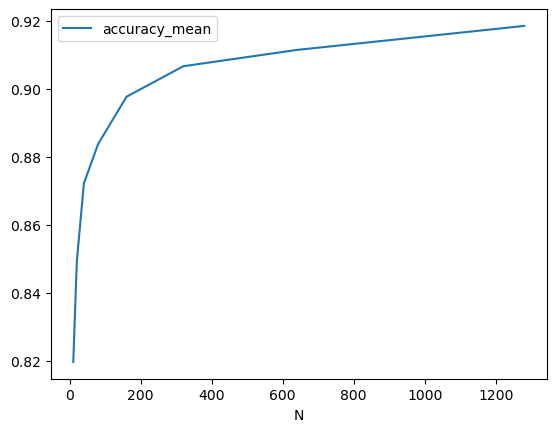

In [51]:
RBF4_N.reset_index(inplace=True)
RBF4_N.plot('N', 'accuracy_mean')

# Hybrid Rot

In [103]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

Rot = pd.read_csv('result_hybrid_rot_SP_pca4.csv', names= colnames)

In [54]:
Rot['accuracy'] = (Rot.tp+Rot.tn)/(Rot.tp+Rot.tn+Rot.fp+Rot.fn)
Rot['jaccard'] = Rot.tp/(Rot.tp+Rot.fp + Rot.fn)
Rot['precision'] = Rot.tp/(Rot.tp+Rot.fp)
Rot['recall'] = Rot.tp/(Rot.tp+Rot.fn)
Rot['specificity'] = Rot.tn/(Rot.tn+Rot.fp)

In [55]:
scenes = np.unique(Rot['scene'])

In [56]:
Rot_agg = Rot.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [57]:
Rot_agg.columns  = ['_'.join(col) for col in Rot_agg.columns.values]
Rot_agg.reset_index(inplace=True)

In [58]:
Rot_N = Rot_agg.groupby('N').agg('mean')
Rot_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/4111368988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Rot_N = Rot_agg.groupby('N').agg('mean')


,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.760598,0.171447,0.454011,0.591910,0.707558,0.781939
20,0.848254,0.083007,0.522194,0.636355,0.721528,0.884912
40,0.865500,0.069049,0.540160,0.668886,0.706491,0.903580
80,0.876293,0.055917,0.566997,0.666821,0.754930,0.906803
160,0.892537,0.042069,0.579117,0.681148,0.764287,0.924312
320,0.900807,0.029750,0.589954,0.691168,0.768638,0.933110
640,0.907588,0.022946,0.598284,0.701102,0.774191,0.940787
1280,0.915634,0.016870,0.612328,0.724189,0.769090,0.952713


In [59]:
Rot_N.accuracy_std.mean()

0.061381933781437484

<AxesSubplot: xlabel='N'>

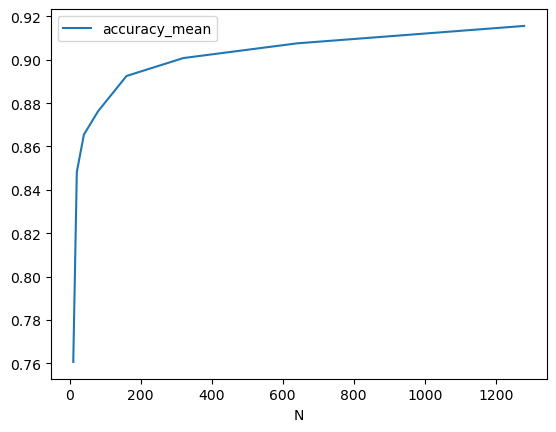

In [60]:
Rot_N.reset_index(inplace=True)
Rot_N.plot('N', 'accuracy_mean')

# WSWS

In [61]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

WSWS = pd.read_csv('result_WSWS_SP_pca4.csv', names= colnames)

In [62]:
WSWS['accuracy'] = (WSWS.tp+WSWS.tn)/(WSWS.tp+WSWS.tn+WSWS.fp+WSWS.fn)
WSWS['jaccard'] = WSWS.tp/(WSWS.tp+WSWS.fp + WSWS.fn)
WSWS['precision'] = WSWS.tp/(WSWS.tp+WSWS.fp)
WSWS['recall'] = WSWS.tp/(WSWS.tp+WSWS.fn)
WSWS['specificity'] = WSWS.tn/(WSWS.tn+WSWS.fp)

In [63]:
WSWS_agg = WSWS.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [64]:
WSWS_agg

accuracy             jaccard  \
                                                   mean       std      mean   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.750280  0.132787  0.455410   
                                         20    0.724690  0.117324  0.425364   
                                         40    0.736370  0.099669  0.420883   
                                         80    0.696706  0.090917  0.415616   
                                         160   0.731672  0.078393  0.392807   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.996167  0.002109  0.993060   
                                         160   0.996321  0.001396  0.993340   
                                         320   0.996120  0.002912  0.992975   
                                         640   0.994737  0.009492  0.990466   
                                         1280  0.996467  0.001985  0.993600   

                                                        precision            \
                                                    std      mean       std   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.165985  0.795574  0.230029   
                                         20    0.097628  0.756250  0.256681   
                                         40    0.151545  0.754725  0.246880   
                                         80    0.069850  0.652764  0.256641   
                                         160   0.099819  0.781979  0.254110   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.003809  0.999180  0.000945   
                                         160   0.002517  0.998896  0.001349   
                                         320   0.005276  0.998918  0.001158   
                                         640   0.017203  0.999339  0.000988   
                                         1280  0.003599  0.999225  0.001069   

                                                 recall           specificity  \
                                                   mean       std        mean   
scene                                    N                                      
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.613843  0.279394    0.818918   
                                         20    0.613518  0.254342    0.780618   
                                         40    0.574840  0.251475    0.817632   
                                         80    0.637521  0.186803    0.726480   
                                         160   0.539250  0.240502    0.828475   
...                                                 ...       ...         ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.993867  0.003287    0.998997   
                                         160   0.994431  0.001927    0.998646   
                                         320   0.994048  0.005505    0.998671   
                                         640   0.991120  0.017334    0.999188   
                                         1280  0.994369  0.003950    0.999048   

                                                         
                                                    std  
scene                                    N               
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.277602  
                                         20    0.273991  
                                         40    0.212453  
                                         80    0.205404  
                                         160   0.211856  
...                                                 ...  
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.001153  
                                         160   0.001655  
                                         320   0.001425  
  

In [65]:
WSWS_agg.columns  = ['_'.join(col) for col in WSWS_agg.columns.values]
WSWS_agg.reset_index(inplace=True)

In [66]:
WSWS_N = WSWS_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/1549448687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WSWS_N = WSWS_agg.groupby('N').agg('mean')


In [67]:
WSWS_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

WSWS_table = np.round(WSWS_N[['accuracy_mean', 'accuracy_std' , 'jaccard_mean', 'jaccard_std', 'precision_mean', 'precision_std', 'recall_mean', 'recall_std', 'specificity_mean', 'specificity_std']], decimals = 3)
WSWS_table

,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
N,,,,,,,,,,
10,0.770,0.156,0.445,0.159,0.600,0.132,0.683,0.247,0.811,0.213
20,0.822,0.127,0.505,0.117,0.622,0.124,0.718,0.175,0.847,0.191
40,0.856,0.082,0.541,0.095,0.654,0.089,0.737,0.144,0.888,0.088
80,0.870,0.067,0.554,0.092,0.674,0.093,0.737,0.120,0.904,0.071
160,0.881,0.059,0.552,0.096,0.710,0.096,0.703,0.140,0.930,0.058
320,0.894,0.044,0.575,0.082,0.698,0.081,0.744,0.104,0.931,0.038
640,0.899,0.048,0.582,0.089,0.714,0.081,0.745,0.114,0.940,0.038
1280,0.910,0.031,0.602,0.064,0.723,0.062,0.758,0.076,0.949,0.026


In [68]:
WSWS_table['accuracy'] = WSWS_table['accuracy_mean'].astype(str) + '(' + WSWS_table['accuracy_std'].astype(str) + ')'
WSWS_table['jaccard'] = WSWS_table['jaccard_mean'].astype(str) + '(' + WSWS_table['jaccard_std'].astype(str) + ')'
WSWS_table['precision'] = WSWS_table['precision_mean'].astype(str) + '(' + WSWS_table['precision_std'].astype(str) + ')'
WSWS_table['recall'] = WSWS_table['recall_mean'].astype(str) + '(' + WSWS_table['recall_std'].astype(str) + ')'
WSWS_table['specificity'] = WSWS_table['specificity_mean'].astype(str) + '(' + WSWS_table['specificity_std'].astype(str) + ')'
WSWS_table.reset_index(inplace=True)

In [69]:
WSWS_table[['N','accuracy', 'jaccard', 'precision', 'recall', 'specificity']]

,N,accuracy,jaccard,precision,recall,specificity
0,10,0.77(0.156),0.445(0.159),0.6(0.132),0.683(0.247),0.811(0.213)
1,20,0.822(0.127),0.505(0.117),0.622(0.124),0.718(0.175),0.847(0.191)
2,40,0.856(0.082),0.541(0.095),0.654(0.089),0.737(0.144),0.888(0.088)
3,80,0.87(0.067),0.554(0.092),0.674(0.093),0.737(0.12),0.904(0.071)
4,160,0.881(0.059),0.552(0.096),0.71(0.096),0.703(0.14),0.93(0.058)
5,320,0.894(0.044),0.575(0.082),0.698(0.081),0.744(0.104),0.931(0.038)
6,640,0.899(0.048),0.582(0.089),0.714(0.081),0.745(0.114),0.94(0.038)
7,1280,0.91(0.031),0.602(0.064),0.723(0.062),0.758(0.076),0.949(0.026)


In [70]:
WSWS_N.accuracy_std.mean()

0.07666430108633376

<AxesSubplot: xlabel='N'>

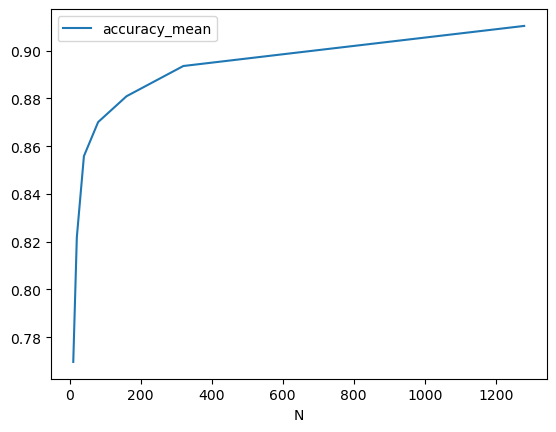

In [71]:
WSWS_N.reset_index(inplace=True)
WSWS_N.plot('N', 'accuracy_mean')

# WS1

In [72]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

WS1 = pd.read_csv('result_hybrid_WS1_SP_pca4.csv', names= colnames)

In [73]:
WS1['accuracy'] = (WS1.tp+WS1.tn)/(WS1.tp+WS1.tn+WS1.fp+WS1.fn)
WS1['jaccard'] = WS1.tp/(WS1.tp+WS1.fp + WS1.fn)
WS1['precision'] = WS1.tp/(WS1.tp+WS1.fp)
WS1['recall'] = WS1.tp/(WS1.tp+WS1.fn)
WS1['specificity'] = WS1.tn/(WS1.tn+WS1.fp)

In [74]:
SVs = WS1.groupby(['N']).agg({
    'SV0' : ['mean'],
    'SV1' : ['mean']
})
SVs['SV0'] + SVs['SV1']

,mean
N,
10,9.15
20,13.90
40,21.70
80,43.95
160,98.60
320,151.80
640,276.75
1280,439.40


In [75]:
WS1_agg = WS1.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std'],
    'SV0' : ['mean'],
    'SV1' : ['mean']

})

In [76]:
WS1_SVs = WS1[WS1['scene'] == 'LC08_L1TP_003052_20160120_20170405_01_T1'][['N', 'SV0', 'SV1']]
WS1_SVs['SV'] = WS1_SVs['SV0']+WS1_SVs['SV1']

In [77]:
WS1_SVs

,N,SV0,SV1,SV
0,10,5,5,10
1,10,4,3,7
2,10,2,3,5
3,10,5,4,9
4,10,4,4,8
...,...,...,...,...
2900,1280,203,204,407
3119,1280,173,173,346
3120,1280,167,168,335
3121,1280,189,187,376


In [78]:
np.array(WS1_SVs[WS1_SVs['N'] == 10]['SV'])/N

array([0.0078125 , 0.00546875, 0.00390625, 0.00703125, 0.00625   ,
       0.0078125 , 0.0078125 , 0.00703125, 0.0078125 , 0.0078125 ,
       0.0078125 , 0.0078125 , 0.0078125 , 0.0078125 , 0.00625   ,
       0.0078125 , 0.0078125 , 0.00625   , 0.00703125, 0.0078125 ])

In [79]:
N_sizes = [10,20,40,80,160,320,640,1280]

l_WS = []
for N in N_sizes:
    l_WS.append( np.array(WS1_SVs[WS1_SVs['N'] == N]['SV'])/N)

In [80]:
np.array(l_WS).shape

(8, 20)

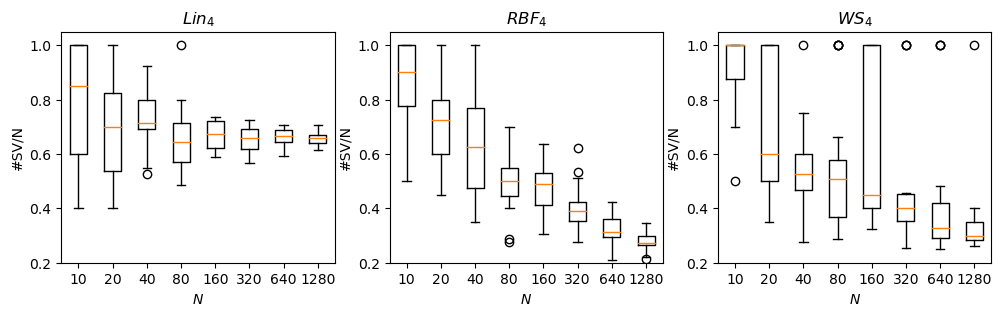

In [81]:
N_sizes = [10,20,40,80,160,320,640,1280]

fig, ax = plt.subplots(1,3, figsize = (12,3))

ax[0].boxplot(np.array(l_lin).T)
ax[0].title.set_text(r'$Lin_4$')
ax[0].set(xlabel = r'$N$', ylabel = '#SV/N', ylim = (0.2,1.05))
ax[0].set_xticklabels(N_sizes)


ax[1].boxplot(np.array(l_RBF).T)
ax[1].title.set_text(r'$RBF_4$')
ax[1].set(xlabel = r'$N$', ylabel = '#SV/N', ylim = (0.2,1.05))
ax[1].set_xticklabels(N_sizes)

ax[2].boxplot(np.array(l_WS).T)
ax[2].title.set_text(r'$WS_4$')
ax[2].set(xlabel = r'$N$', ylabel = '#SV/N', ylim = (0.2,1.05))
ax[2].set_xticklabels(N_sizes)



plt.savefig('SVs.png', dpi = 300, bbox_inches='tight')
plt.show()

In [82]:
WS1_agg

accuracy             jaccard  \
                                                   mean       std      mean   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.749600  0.132075  0.457061   
                                         20    0.721726  0.118934  0.420713   
                                         40    0.710279  0.132756  0.404619   
                                         80    0.696004  0.090682  0.412763   
                                         160   0.722447  0.077275  0.385846   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.996373  0.001779  0.993433   
                                         160   0.996355  0.001375  0.993403   
                                         320   0.995842  0.002999  0.992470   
                                         640   0.993796  0.010260  0.988760   
                                         1280  0.996527  0.001926  0.993708   

                                                        precision            \
                                                    std      mean       std   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.166648  0.787828  0.229914   
                                         20    0.099511  0.753071  0.259686   
                                         40    0.157272  0.729352  0.265267   
                                         80    0.068550  0.652479  0.257113   
                                         160   0.090598  0.760711  0.261412   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.003211  0.999198  0.000937   
                                         160   0.002478  0.998857  0.001337   
                                         320   0.005436  0.998908  0.001149   
                                         640   0.018595  0.999324  0.000990   
                                         1280  0.003492  0.999256  0.001038   

                                                 recall           specificity  \
                                                   mean       std        mean   
scene                                    N                                      
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.619085  0.278389    0.815259   
                                         20    0.606642  0.252103    0.779622   
                                         40    0.578658  0.260191    0.776496   
                                         80    0.631739  0.184915    0.728334   
                                         160   0.543231  0.238711    0.812607   
...                                                 ...       ...         ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.994224  0.002635    0.999018   
                                         160   0.994533  0.001891    0.998598   
                                         320   0.993553  0.005745    0.998659   
                                         640   0.989428  0.018764    0.999171   
                                         1280  0.994448  0.003842    0.999085   

                                                            SV0     SV1  
                                                    std    mean    mean  
scene                                    N                               
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.276012    4.60    4.55  
                                         20    0.274013    7.15    6.75  
                                         40    0.270261   10.75   10.95  
                                         80    0.204243   22.25   21.70  
                                         160   0.212890   49.05   49.55  
...                                                 ...     ...     ...  
LC08_L1TP_066014_20160520_201702

In [83]:
N_sizes = [10,20,40,80,160,320,640]

l_WS = []
for N in N_sizes:
    l_WS.append( WS1SVs[WS1SVs['N'] == N])

NameError: name 'WS1SVs' is not defined

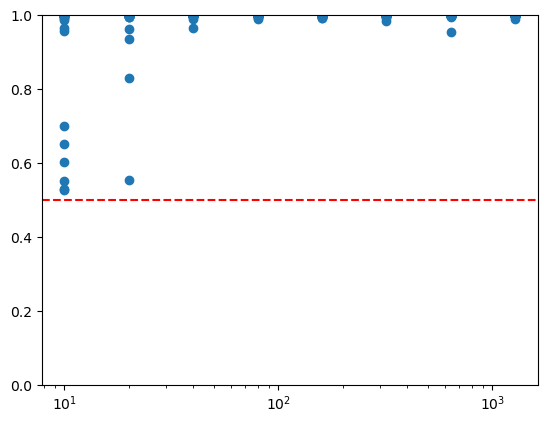

In [84]:
scenes = np.unique(WSWS['scene'])
dfplt = WSWS[WSWS['scene'] == scenes[19]]
plt.scatter(dfplt['N'], dfplt['accuracy'])
plt.xscale('log')
plt.ylim((0,1))
plt.axhline(0.5, linestyle = 'dashed', c = 'red')
plt.show()

In [85]:
#['_'.join(col) for col in WSWS_agg.columns.values]

WS1_agg.columns  = ['_'.join(col) for col in WS1_agg.columns.values]
WS1_agg.reset_index(inplace=True)

In [86]:
WS1_N = WS1_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/475583216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WS1_N = WS1_agg.groupby('N').agg('mean')


In [87]:
WS1_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

WS_table = np.round(WS1_N[['accuracy_mean', 'accuracy_std' , 'jaccard_mean', 'jaccard_std', 'precision_mean', 'precision_std', 'recall_mean', 'recall_std', 'specificity_mean', 'specificity_std']], decimals = 3)
WS_table

,accuracy_mean,accuracy_std,jaccard_mean,jaccard_std,precision_mean,precision_std,recall_mean,recall_std,specificity_mean,specificity_std
N,,,,,,,,,,
10,0.769,0.156,0.446,0.157,0.599,0.131,0.684,0.245,0.810,0.213
20,0.821,0.128,0.503,0.119,0.621,0.125,0.717,0.178,0.847,0.191
40,0.838,0.128,0.530,0.112,0.642,0.130,0.737,0.142,0.858,0.196
80,0.870,0.066,0.554,0.091,0.675,0.094,0.737,0.119,0.905,0.070
160,0.881,0.057,0.553,0.096,0.708,0.097,0.703,0.135,0.929,0.055
320,0.893,0.044,0.568,0.092,0.709,0.088,0.731,0.122,0.935,0.036
640,0.895,0.053,0.573,0.100,0.717,0.087,0.731,0.129,0.940,0.040
1280,0.911,0.031,0.602,0.064,0.723,0.061,0.757,0.076,0.949,0.026


In [88]:
WS_table['accuracy'] = WS_table['accuracy_mean'].astype(str) + '(' + WS_table['accuracy_std'].astype(str) + ')'
WS_table['jaccard'] = WS_table['jaccard_mean'].astype(str) + '(' + WS_table['jaccard_std'].astype(str) + ')'
WS_table['precision'] = WS_table['precision_mean'].astype(str) + '(' + WS_table['precision_std'].astype(str) + ')'
WS_table['recall'] = WS_table['recall_mean'].astype(str) + '(' + WS_table['recall_std'].astype(str) + ')'
WS_table['specificity'] = WS_table['specificity_mean'].astype(str) + '(' + WS_table['specificity_std'].astype(str) + ')'
WS_table.reset_index(inplace=True)

In [89]:
WS_table[['N','accuracy', 'jaccard', 'precision', 'recall', 'specificity']]

,N,accuracy,jaccard,precision,recall,specificity
0,10,0.769(0.156),0.446(0.157),0.599(0.131),0.684(0.245),0.81(0.213)
1,20,0.821(0.128),0.503(0.119),0.621(0.125),0.717(0.178),0.847(0.191)
2,40,0.838(0.128),0.53(0.112),0.642(0.13),0.737(0.142),0.858(0.196)
3,80,0.87(0.066),0.554(0.091),0.675(0.094),0.737(0.119),0.905(0.07)
4,160,0.881(0.057),0.553(0.096),0.708(0.097),0.703(0.135),0.929(0.055)
5,320,0.893(0.044),0.568(0.092),0.709(0.088),0.731(0.122),0.935(0.036)
6,640,0.895(0.053),0.573(0.1),0.717(0.087),0.731(0.129),0.94(0.04)
7,1280,0.911(0.031),0.602(0.064),0.723(0.061),0.757(0.076),0.949(0.026)


In [90]:
WS1_N.accuracy_std.mean()

0.08271672060052969

<AxesSubplot: xlabel='N'>

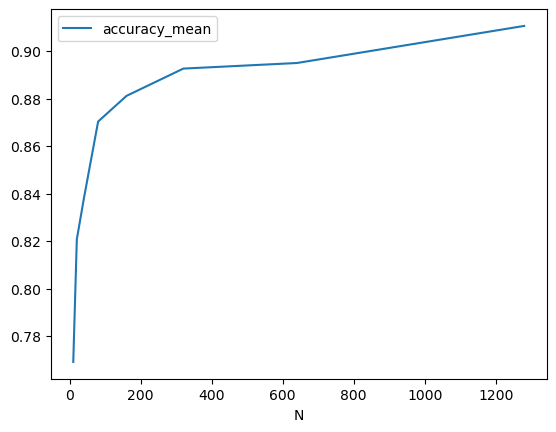

In [91]:
WS1_N.reset_index(inplace=True)
WS1_N.plot('N', 'accuracy_mean')

# SELS

In [92]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

SELS = pd.read_csv('result_hybrid_SELS_1_SP_pca4.csv', names= colnames)

In [93]:
SELS['accuracy'] = (SELS.tp+SELS.tn)/(SELS.tp+SELS.tn+SELS.fp+SELS.fn)
SELS['jaccard'] = SELS.tp/(SELS.tp+SELS.fp + SELS.fn)
SELS['precision'] = SELS.tp/(SELS.tp+SELS.fp)
SELS['recall'] = SELS.tp/(SELS.tp+SELS.fn)
SELS['specificity'] = SELS.tn/(SELS.tn+SELS.fp)

In [94]:
SELS_agg = SELS.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [95]:
SELS_agg

accuracy             jaccard  \
                                                   mean       std      mean   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.702542  0.154542  0.389306   
                                         20    0.685650  0.122323  0.347391   
                                         40    0.715935  0.089572  0.355372   
                                         80    0.663650  0.129424  0.387618   
                                         160   0.722415  0.088545  0.393770   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.973848  0.099174  0.970706   
                                         160   0.996543  0.001230  0.993744   
                                         320   0.996081  0.002725  0.992904   
                                         640   0.973331  0.099197  0.969758   
                                         1280  0.952421  0.136821  0.949969   

                                                        precision            \
                                                    std      mean       std   
scene                                    N                                    
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.159367  0.737968  0.246798   
                                         20    0.128335  0.701951  0.279846   
                                         40    0.133500  0.762076  0.247569   
                                         80    0.085129  0.606901  0.258705   
                                         160   0.100200  0.736562  0.263921   
...                                                 ...       ...       ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.098852  0.976192  0.099747   
                                         160   0.002222  0.998445  0.001363   
                                         320   0.004937  0.998667  0.000914   
                                         640   0.099120  0.976646  0.099849   
                                         1280  0.136564  0.954572  0.137551   

                                                 recall           specificity  \
                                                   mean       std        mean   
scene                                    N                                      
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.560435  0.280624    0.774034   
                                         20    0.514777  0.272262    0.771613   
                                         40    0.494031  0.263977    0.827569   
                                         80    0.618640  0.197988    0.686294   
                                         160   0.540000  0.204616    0.814185   
...                                                 ...       ...         ...   
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.994329  0.003044    0.948644   
                                         160   0.995286  0.002252    0.998089   
                                         320   0.994225  0.005173    0.998364   
                                         640   0.992913  0.010225    0.949234   
                                         1280  0.995001  0.001148    0.900025   

                                                         
                                                    std  
scene                                    N               
LC08_L1TP_003052_20160120_20170405_01_T1 10    0.321878  
                                         20    0.266454  
                                         40    0.215079  
                                         80    0.241898  
                                         160   0.198999  
...                                                 ...  
LC08_L1TP_066014_20160520_20170223_01_T1 80    0.221407  
                                         160   0.001679  
                                         320   0.001124  
  

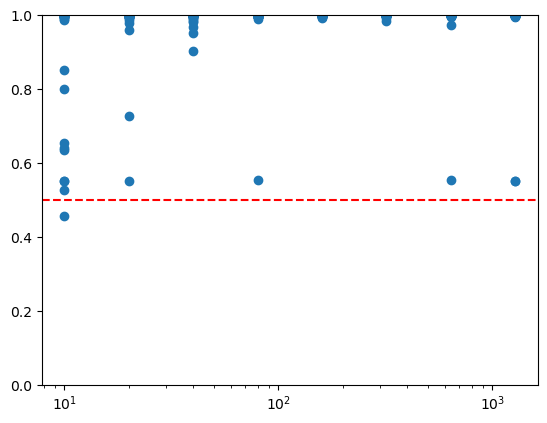

In [96]:
scenes = np.unique(SELS['scene'])
dfplt = SELS[SELS['scene'] == scenes[19]]
plt.scatter(dfplt['N'], dfplt['accuracy'])
plt.xscale('log')
plt.ylim((0,1))
plt.axhline(0.5, linestyle = 'dashed', c = 'red')
plt.show()

In [97]:
#['_'.join(col) for col in WSWS_agg.columns.values]

SELS_agg.columns  = ['_'.join(col) for col in SELS_agg.columns.values]
SELS_agg.reset_index(inplace=True)

In [98]:
SELS_N = SELS_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_933/3917772423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SELS_N = SELS_agg.groupby('N').agg('mean')


In [99]:
SELS_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.735517,0.173551,0.409166,0.564416,0.645905,0.775392
20,0.814695,0.138211,0.482623,0.618069,0.681061,0.851458
40,0.844588,0.096939,0.516450,0.656416,0.697576,0.890657
80,0.846032,0.117170,0.532058,0.648170,0.726655,0.869283
160,0.877692,0.061082,0.554457,0.680739,0.728245,0.916878
320,0.893211,0.043354,0.573016,0.697043,0.739103,0.931306
640,0.877855,0.098439,0.562813,0.682652,0.739192,0.903006
1280,0.871313,0.126066,0.573351,0.673475,0.761969,0.881443


In [100]:
SELS_N.accuracy_std.mean()

0.10685147806008576

<AxesSubplot: xlabel='N'>

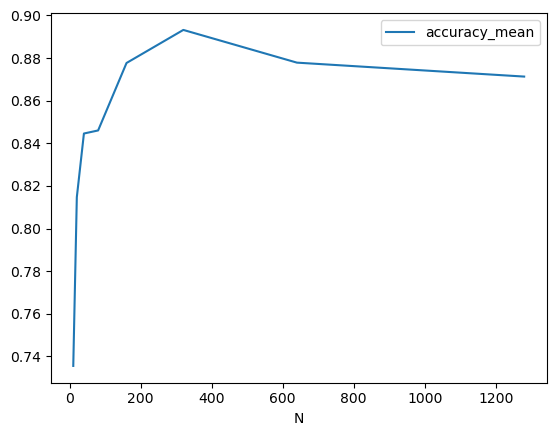

In [101]:
SELS_N.reset_index(inplace=True)
SELS_N.plot('N', 'accuracy_mean')

# Comparison

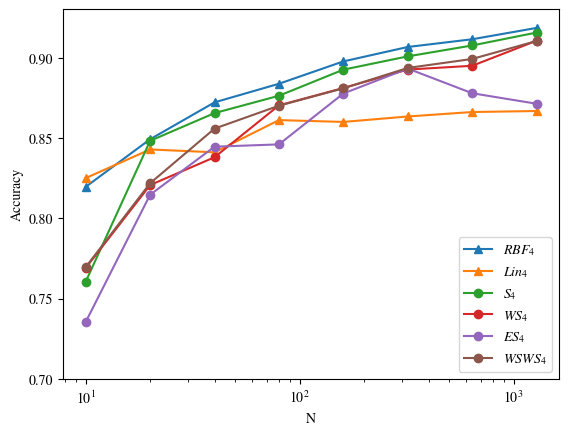

In [102]:
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

#plt.plot(RBF_N['N'], RBF_N['accuracy_mean'], marker = '^', label = "RBF")
plt.plot(RBF4_N['N'], RBF4_N['accuracy_mean'], marker = '^', label = r"$RBF_4$")
#plt.plot(lin_N['N'], lin_N['accuracy_mean'], marker = '^', label = "Lin")
plt.plot(lin4_N['N'], lin4_N['accuracy_mean'], marker = '^', label = r"$Lin_4$")
#plt.plot(WSp5_N['N'], WSp5_N['accuracy_mean'], marker = 'o', label = r"$WS^5_2$")
plt.plot(Rot_N['N'], Rot_N['accuracy_mean'], marker = 'o', label = r"$S_4$")
plt.plot(WS1_N['N'], WS1_N['accuracy_mean'], marker = 'o', label = r"$WS_4$")
plt.plot(SELS_N['N'], SELS_N['accuracy_mean'], marker = 'o', label = r"$ES_4$")
plt.plot(WSWS_N['N'], WSWS_N['accuracy_mean'], marker = 'o', label = r'$WSWS_4$')
plt.ylabel('Accuracy')
plt.xlabel('N')
plt.ylim((.7,.93))
plt.xscale('log')
plt.legend()
plt.savefig('Acc_N.png', dpi = 300, bbox_inches='tight')
plt.show()

In [96]:
dN = RBF4_N['N'][:-1]

In [1]:
change_RBF4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_RBF4['dN'] = dN
change_RBF4['dAcc'] = np.array(RBF4_N.accuracy_mean[1:]) - np.array(RBF4_N.accuracy_mean[:-1])

change_Lin4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_Lin4['dN'] = dN
change_Lin4['dAcc'] = np.array(lin4_N.accuracy_mean[1:]) - np.array(lin4_N.accuracy_mean[:-1])

change_Rot4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_Rot4['dN'] = dN
change_Rot4['dAcc'] = np.array(Rot_N.accuracy_mean[1:]) - np.array(Rot_N.accuracy_mean[:-1])

change_WS4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_WS4['dN'] = dN
change_WS4['dAcc'] = np.array(WS1_N.accuracy_mean[1:]) - np.array(WS1_N.accuracy_mean[:-1])

change_ES4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_ES4['dN'] = dN
change_ES4['dAcc'] = np.array(SELS_N.accuracy_mean[1:]) - np.array(SELS_N.accuracy_mean[:-1])

change_WSWS4 = pd.DataFrame(columns = ["dN", "dAcc"])
change_WSWS4['dN'] = dN
change_WSWS4['dAcc'] = np.array(WSWS_N.accuracy_mean[1:]) - np.array(WSWS_N.accuracy_mean[:-1])

NameError: name 'pd' is not defined

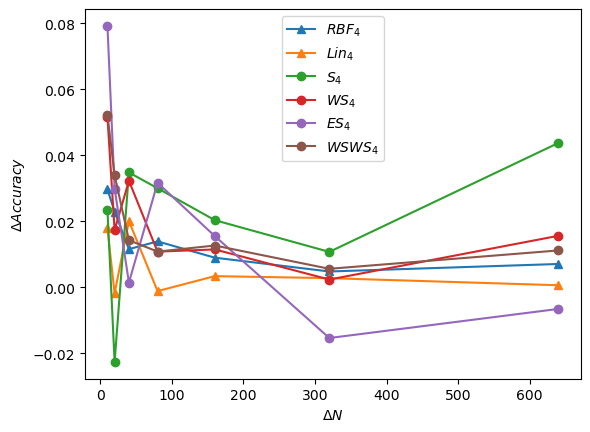

In [104]:
plt.plot(change_RBF4['dN'], change_RBF4['dAcc'], marker = '^', label = r"$RBF_4$")
plt.plot(change_Lin4['dN'], change_Lin4['dAcc'], marker = '^', label = r"$Lin_4$")
plt.plot(change_Rot4['dN'], change_Rot4['dAcc'], marker = 'o', label = r"$S_4$")
plt.plot(change_WS4['dN'], change_WS4['dAcc'], marker = 'o', label = r"$WS_4$")
plt.plot(change_ES4['dN'], change_ES4['dAcc'], marker = 'o', label = r"$ES_4$")
plt.plot(change_WSWS4['dN'], change_WSWS4['dAcc'], marker = 'o', label = r'$WSWS_4$')
plt.ylabel(r'$\Delta Accuracy$')
plt.xlabel(r'$\Delta N$')
#plt.ylim((.7,.93))
#plt.xscale('log')
plt.legend()
plt.show()

In [92]:
np.array(RBF4_N.accuracy_mean[:-1])

array([0.81959621, 0.84923179, 0.87218897, 0.88375742, 0.89766969,
       0.90664639, 0.91144385])

In [93]:
np.array(RBF4_N.accuracy_mean[1:]) - np.array(RBF4_N.accuracy_mean[:-1])

array([0.02963559, 0.02295718, 0.01156844, 0.01391227, 0.00897671,
       0.00479746, 0.00706822])

In [90]:
RBF[RBF.scene == scenes[0]]

,N,tp,tn,fp,fn,SV0,SV1,C,p,timestamp,scene,accuracy,jaccard,precision,recall,specificity
0,10,3061457,39493530,8864,16811360,5,5,0.1,3.1,2301061236,LC08_L1TP_003052_20160120_20170405_01_T1,0.716713,0.153984,0.997113,0.154052,0.999776
1,10,5471543,39493119,9275,14401274,4,3,18.1,3.1,2301061236,LC08_L1TP_003052_20160120_20170405_01_T1,0.757297,0.275200,0.998308,0.275328,0.999765
2,10,6624466,39398852,103542,13248351,5,5,0.1,3.1,2301061236,LC08_L1TP_003052_20160120_20170405_01_T1,0.775127,0.331615,0.984610,0.333343,0.997379
3,10,8729533,39474374,28020,11143284,4,4,75.1,0.1,2301061236,LC08_L1TP_003052_20160120_20170405_01_T1,0.811852,0.438652,0.996800,0.439270,0.999291
4,10,4646341,39489838,12556,15226476,4,3,3.1,3.1,2301061236,LC08_L1TP_003052_20160120_20170405_01_T1,0.743344,0.233656,0.997305,0.233804,0.999682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1280,11229782,39462767,39627,8643035,160,163,45.1,3.1,2301071239,LC08_L1TP_003052_20160120_20170405_01_T1,0.853766,0.563958,0.996484,0.565083,0.998997
3118,1280,11032266,39442587,59807,8840551,132,124,111.1,3.1,2301071428,LC08_L1TP_003052_20160120_20170405_01_T1,0.850100,0.553478,0.994608,0.555144,0.998486
3121,1280,12054647,39283436,218958,7818170,137,137,60.1,9.1,2301071431,LC08_L1TP_003052_20160120_20170405_01_T1,0.864638,0.599979,0.982160,0.606590,0.994457
3122,1280,11450492,39336553,165841,8422325,140,125,66.1,12.1,2301071431,LC08_L1TP_003052_20160120_20170405_01_T1,0.855358,0.571420,0.985723,0.576189,0.995802


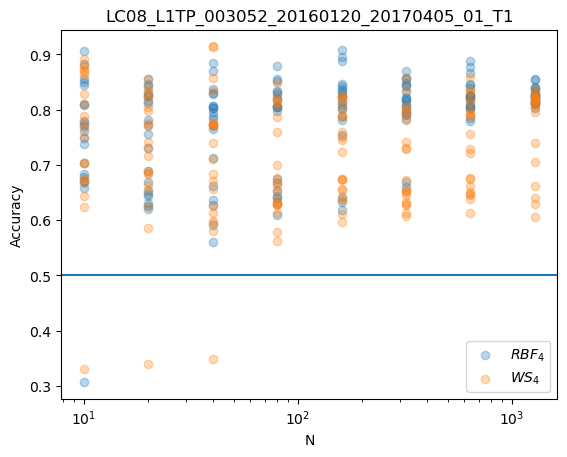

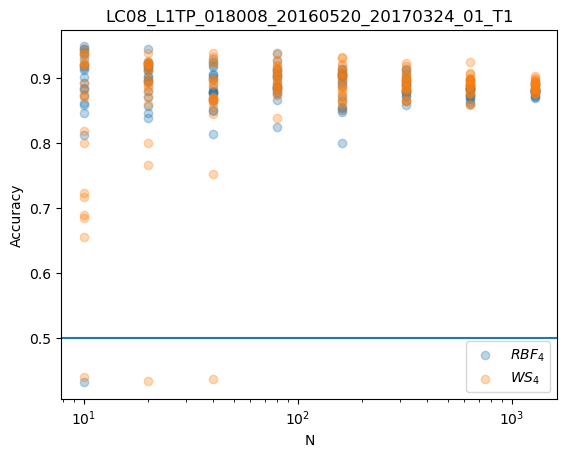

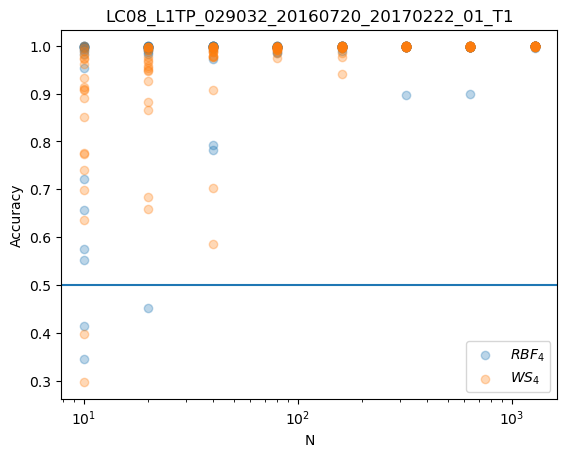

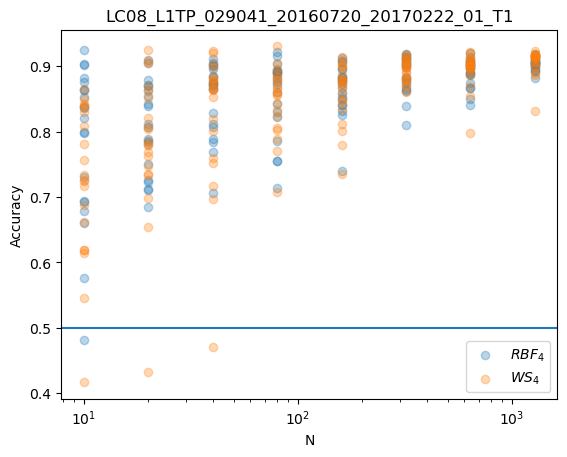

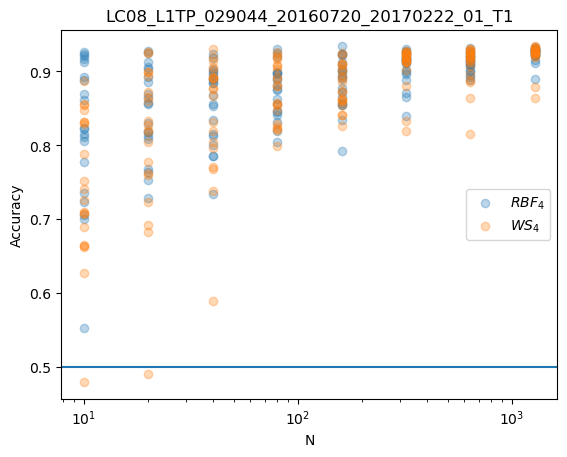

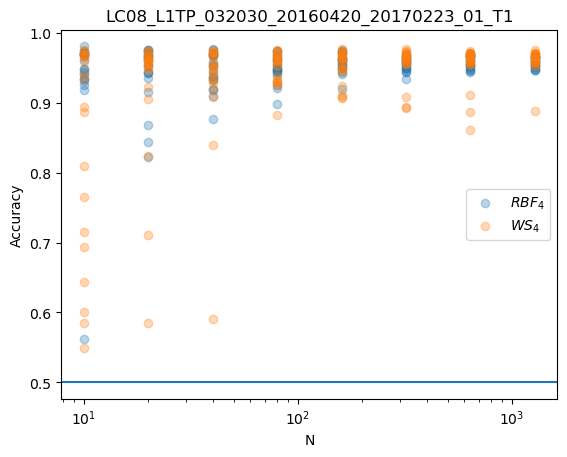

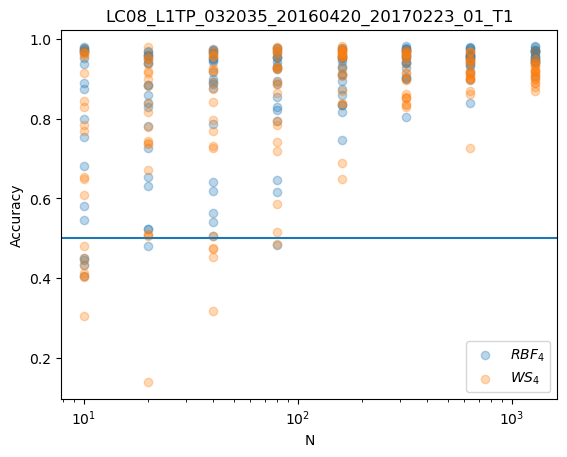

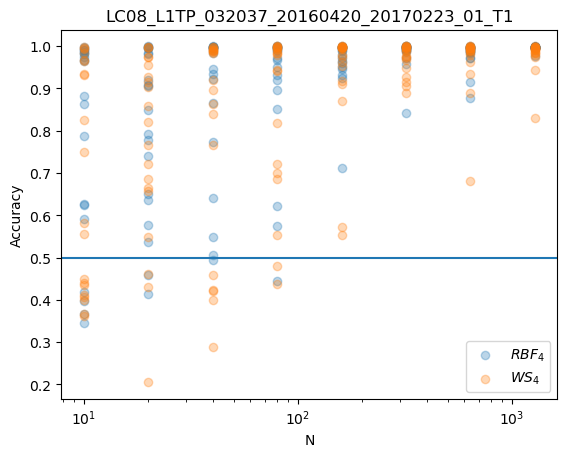

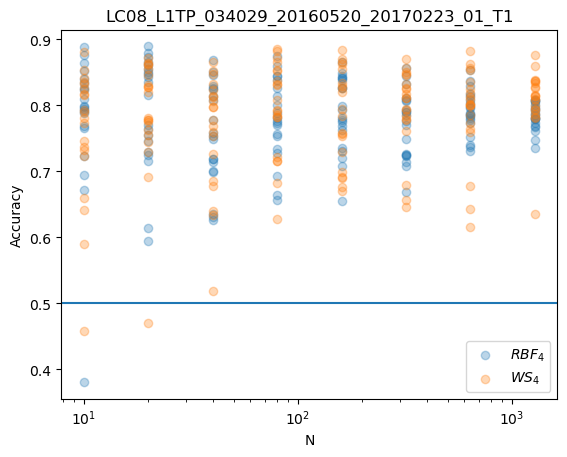

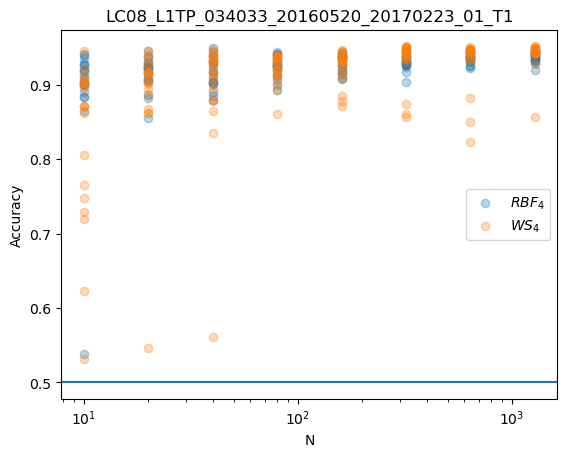

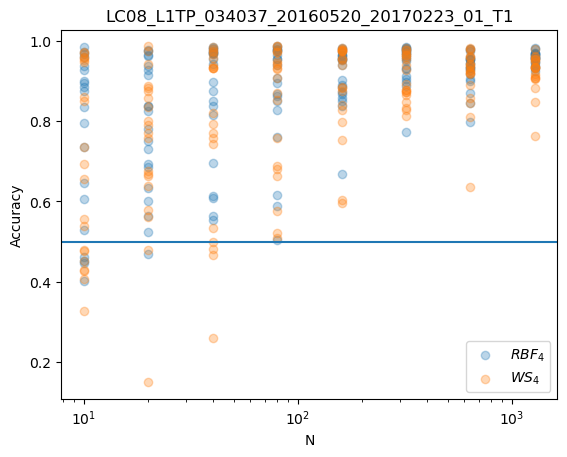

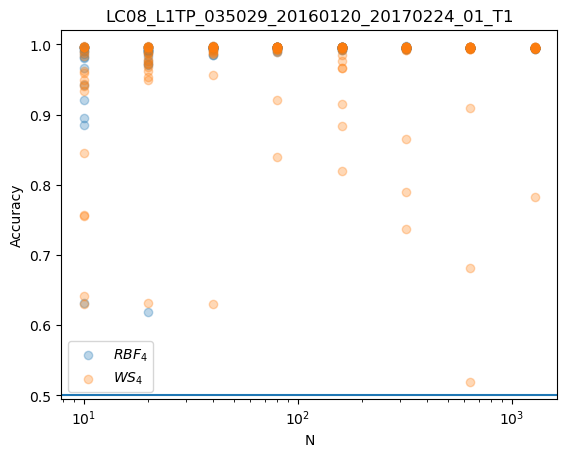

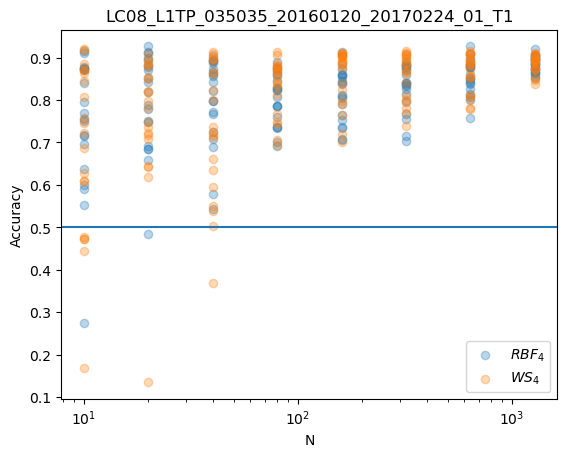

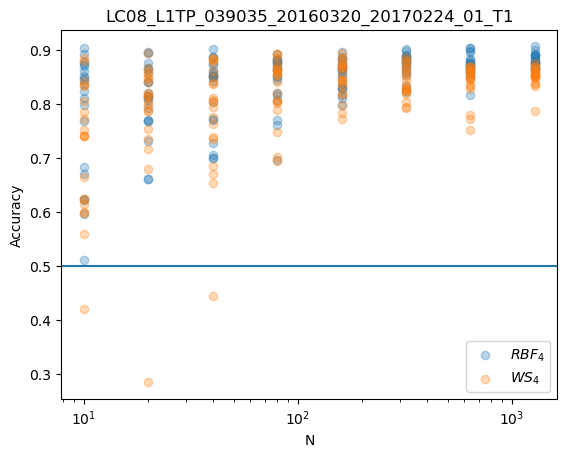

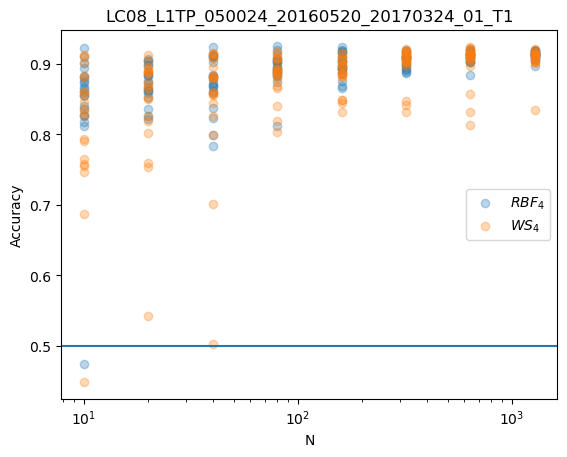

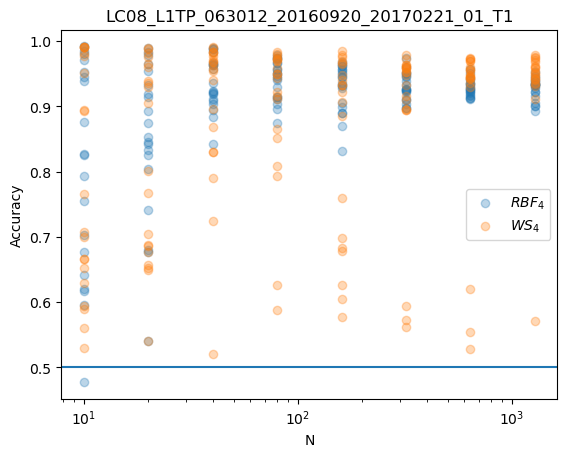

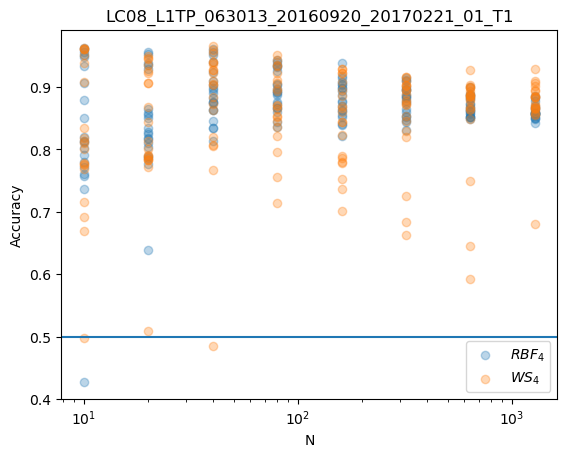

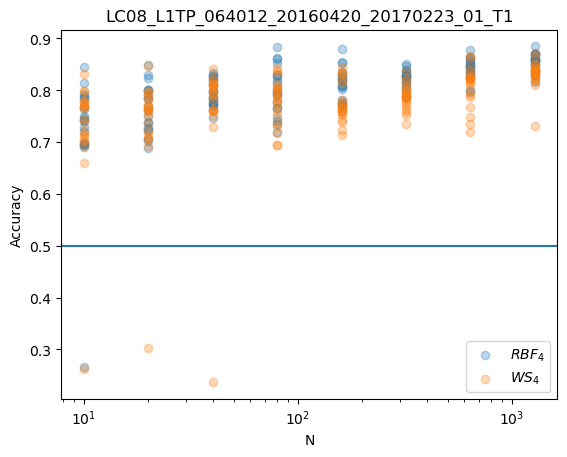

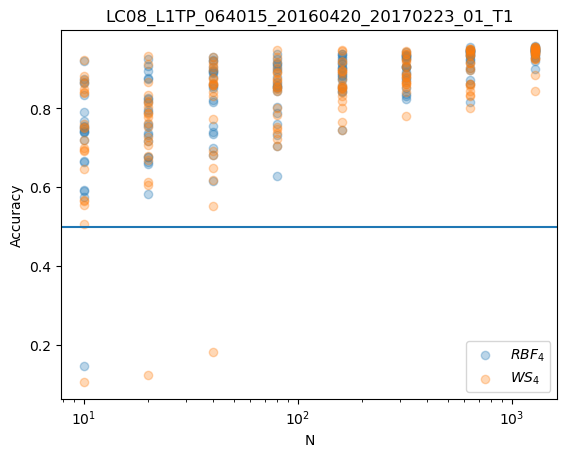

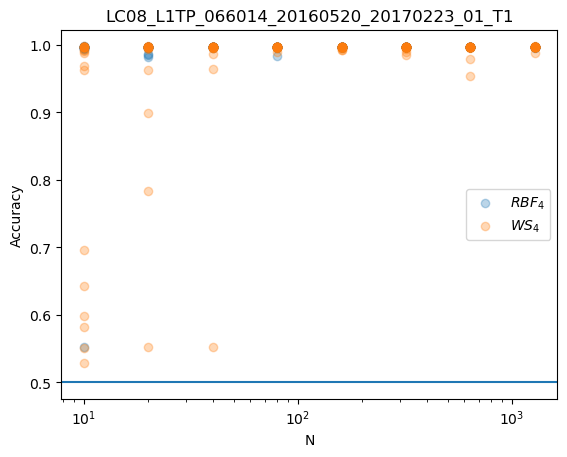

In [122]:
for i in range(len(scenes)):
    plt.scatter(RBF4[RBF4.scene == scenes[i]].N, RBF4[RBF4.scene == scenes[i]].accuracy, label = r'$RBF_4$', alpha=0.3)
    plt.scatter(WS1[WS1.scene == scenes[i]].N, WS1[WS1.scene == scenes[i]].accuracy, label = r'$WS_4$', alpha=0.3)
    plt.title(scenes[i])
    plt.xscale('log')
    plt.axhline(y=0.5)
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

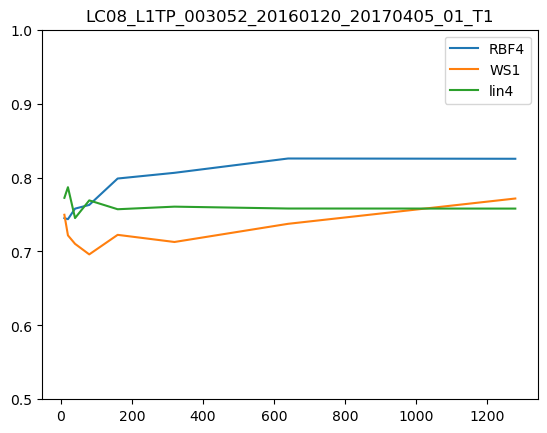

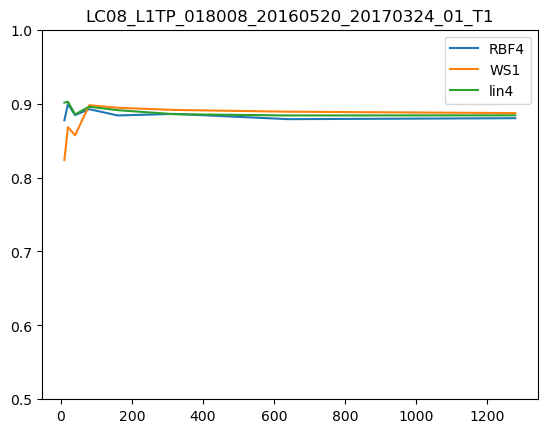

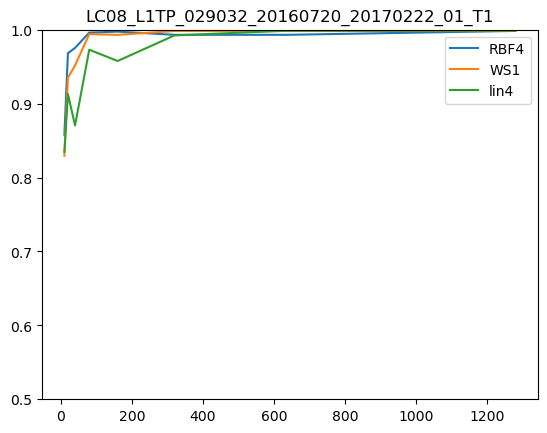

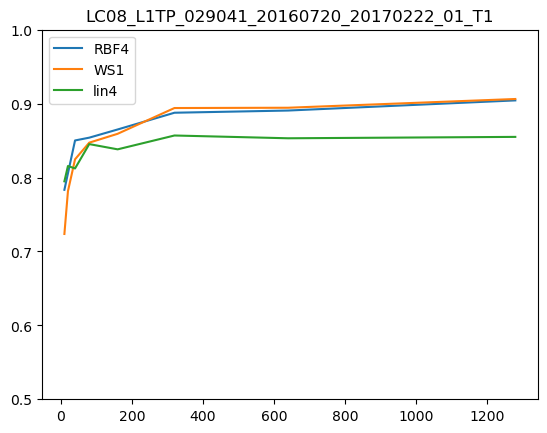

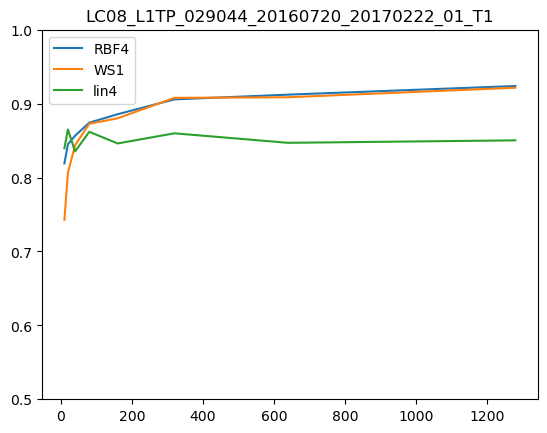

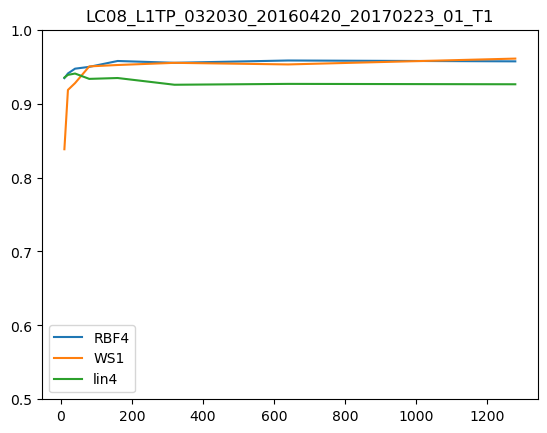

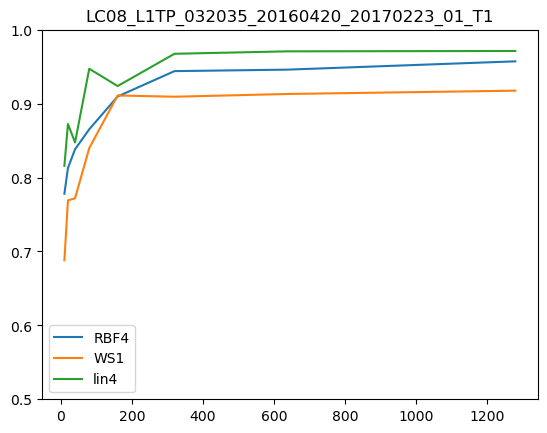

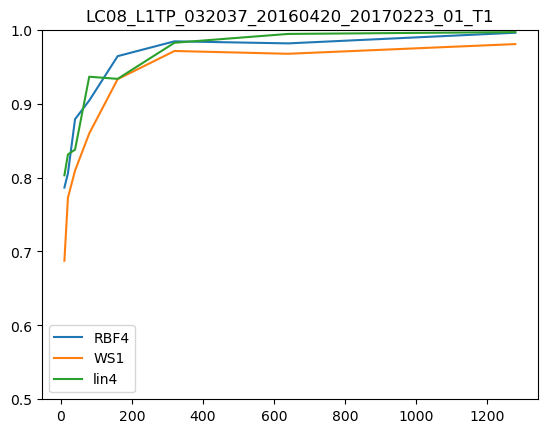

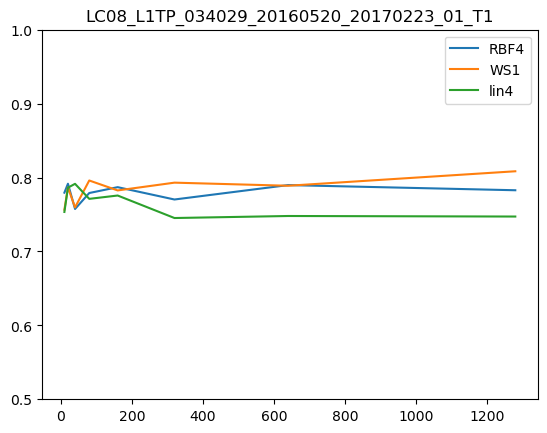

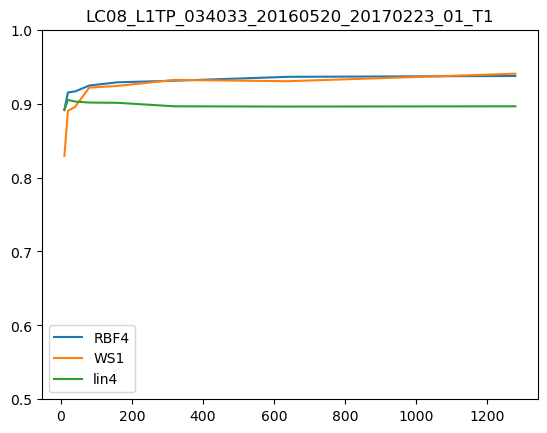

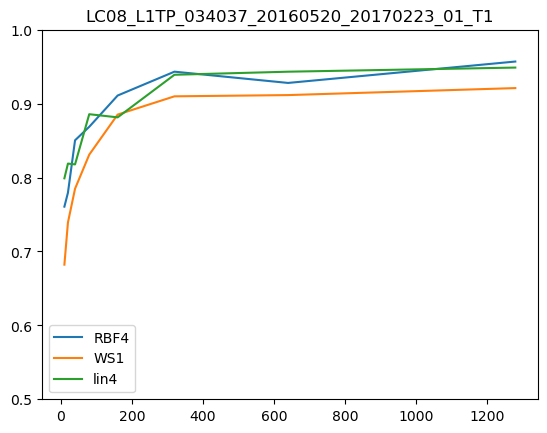

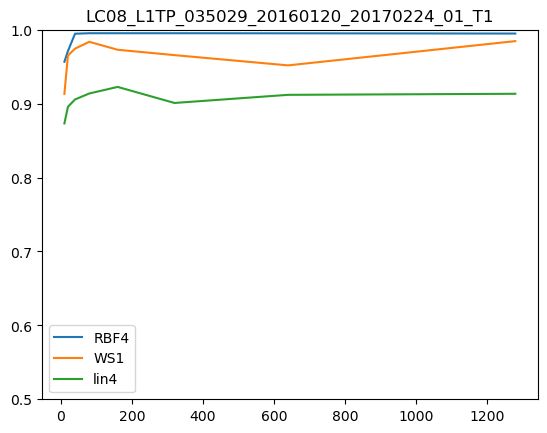

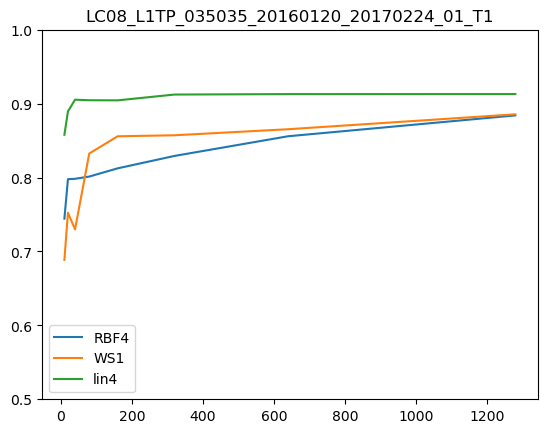

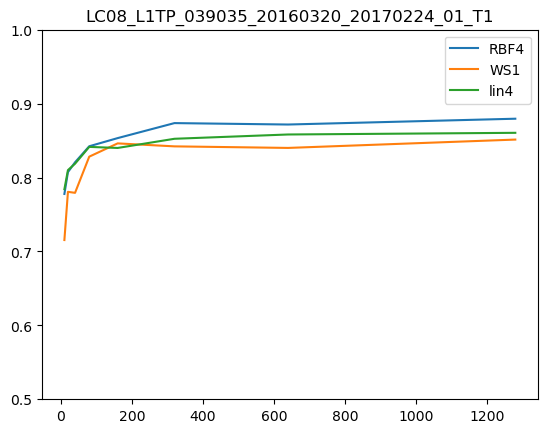

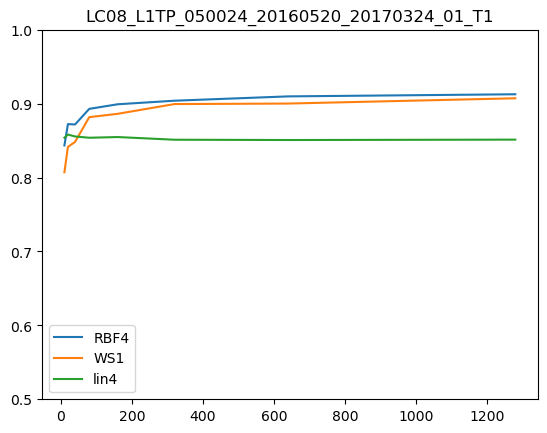

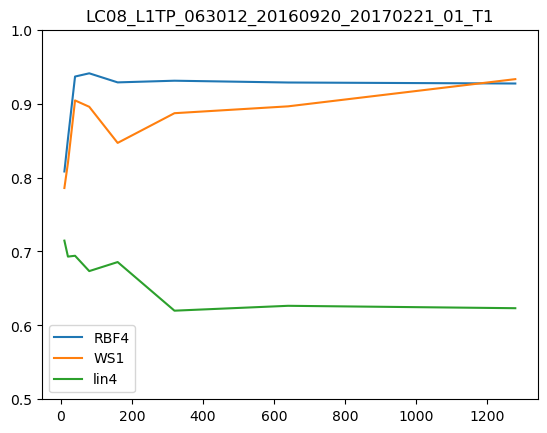

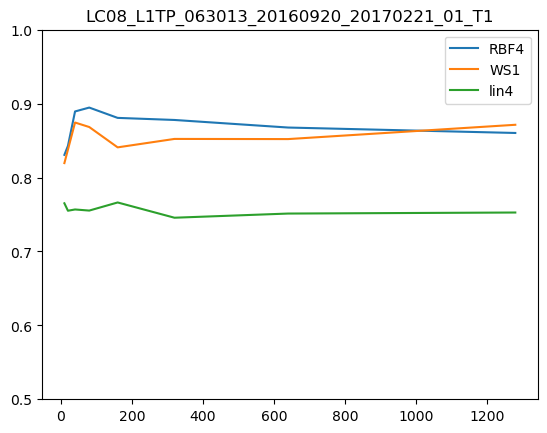

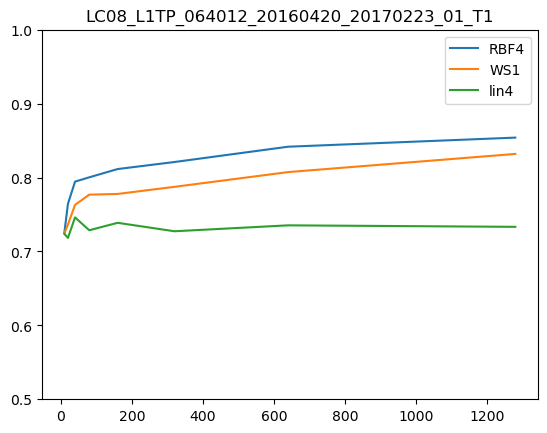

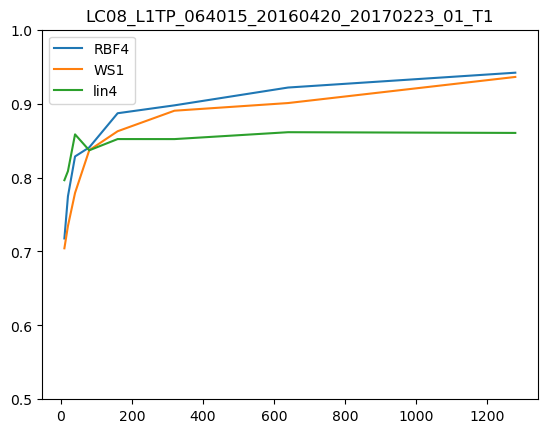

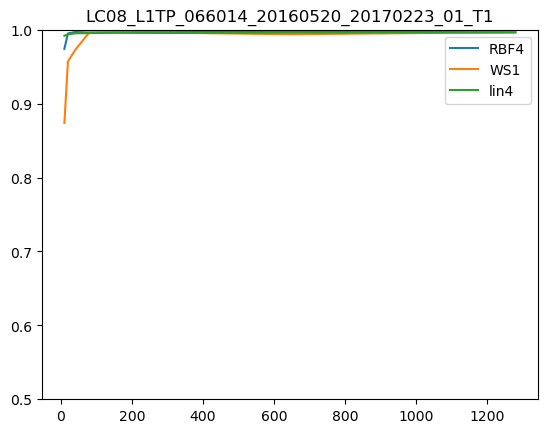

In [110]:
for i in range(len(scenes)):
    plt.plot(RBF4_agg[RBF4_agg.scene == scenes[i]]['N'], RBF4_agg[RBF4_agg.scene == scenes[i]]['accuracy_mean'], label = 'RBF4')
    plt.plot(WS1_agg[WS1_agg.scene == scenes[i]]['N'], WS1_agg[WS1_agg.scene == scenes[i]]['accuracy_mean'],  label = 'WS1')
    plt.plot(lin4_agg[lin4_agg.scene == scenes[i]]['N'], lin4_agg[lin4_agg.scene == scenes[i]]['accuracy_mean'],  label = 'lin4')
    plt.title(scenes[i])
    plt.legend()
    plt.ylim((0.5,1))
    plt.show()

# Hybrid rot TA

In [ ]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

RotTA = pd.read_csv('result_hybrid_rot_TA_SP_pca4.csv', names= colnames)

In [ ]:
RotTA['accuracy'] = (RotTA.tp+RotTA.tn)/(RotTA.tp+RotTA.tn+RotTA.fp+RotTA.fn)
RotTA['jaccard'] = RotTA.tp/(RotTA.tp+RotTA.fp + RotTA.fn)
RotTA['precision'] = RotTA.tp/(RotTA.tp+RotTA.fp)
RotTA['recall'] = RotTA.tp/(RotTA.tp+RotTA.fn)
RotTA['specificity'] = RotTA.tn/(RotTA.tn+RotTA.fp)

In [ ]:
scenes = np.unique(RotTA['scene'])

In [ ]:
RotTA_agg = RotTA.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [ ]:
RotTA_agg.columns  = ['_'.join(col) for col in RotTA_agg.columns.values]
RotTA_agg.reset_index(inplace=True)

In [ ]:
RotTA_N = RotTA_agg.groupby('N').agg('mean')
RotTA_N[['accuracy_mean', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_916/3717838498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  RotTA_N = RotTA_agg.groupby('N').agg('mean')


,accuracy_mean,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,
10,0.688369,0.331027,0.516967,0.573175,0.779071
20,0.687675,0.302976,0.515820,0.508722,0.802522
40,0.687718,0.307865,0.515798,0.519108,0.798713


# WSp5

In [ ]:
colnames = ['N', 'tp', 'tn', 'fp', 'fn', 'SV0', 'SV1', 'C', 'p', 'timestamp', 'scene']

WSp5 = pd.read_csv('result_hybrid_WSp5_SP_pca2.csv', names= colnames)

In [ ]:
WSp5['accuracy'] = (WSp5.tp+WSp5.tn)/(WSp5.tp+WSp5.tn+WSp5.fp+WSp5.fn)
WSp5['jaccard'] = WSp5.tp/(WSp5.tp+WSp5.fp + WSp5.fn)
WSp5['precision'] = WSp5.tp/(WSp5.tp+WSp5.fp)
WSp5['recall'] = WSp5.tp/(WSp5.tp+WSp5.fn)
WSp5['specificity'] = WSp5.tn/(WSp5.tn+WSp5.fp)

In [ ]:
WSp5_agg = WSp5.groupby(['scene', 'N']).agg({
    'accuracy' : ['mean', 'std'],
    'jaccard' : ['mean', 'std'],
    'precision' : ['mean', 'std'],
    'recall' : ['mean', 'std'],
    'specificity' : ['mean', 'std']
})

In [ ]:
['_'.join(col) for col in WSp5_agg.columns.values]

WSp5_agg.columns  = ['_'.join(col) for col in WSp5_agg.columns.values]
WSp5_agg.reset_index(inplace=True)

In [ ]:
WSp5_N = WSp5_agg.groupby('N').agg('mean')

/var/folders/3c/ljwwm7tx1h3_05wq1m93d6mr0000gn/T/ipykernel_916/4083679202.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WSp5_N = WSp5_agg.groupby('N').agg('mean')


In [ ]:
WSp5_N[['accuracy_mean', 'accuracy_std', 'jaccard_mean', 'precision_mean', 'recall_mean', 'specificity_mean']]

,accuracy_mean,accuracy_std,jaccard_mean,precision_mean,recall_mean,specificity_mean
N,,,,,,
10,0.788986,0.133733,0.460398,0.620185,0.667859,0.841879
20,0.836449,0.076329,0.472848,0.670068,0.623021,0.904564
40,0.840392,0.074746,0.465941,0.673816,0.577746,0.914545
80,0.849378,0.047958,0.485401,0.686551,0.609908,0.920500
160,0.853884,0.041698,0.490260,0.695013,0.610367,0.925228
320,0.859392,0.029412,0.497806,0.710373,0.619698,0.930649
640,0.859334,0.021929,0.502621,0.699316,0.628092,0.926224
1280,0.860645,0.016607,0.505831,0.692520,0.639275,0.924087


In [ ]:
WSp5_N.accuracy_std.mean()

0.05530155502822815

<AxesSubplot: xlabel='N'>

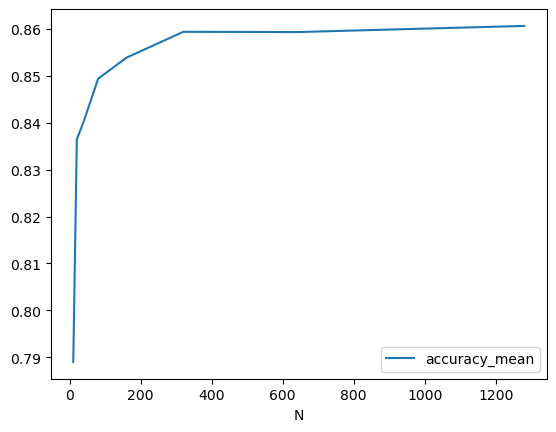

In [ ]:
WSp5_N.reset_index(inplace=True)
WSp5_N.plot('N', 'accuracy_mean')